In [1]:
from sklearn import linear_model
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold,train_test_split, cross_val_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("./Data/BostonHousing.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [84]:
y = data["medv"]
X = data.drop("medv",axis = 1)

In [85]:
#Checking for null values
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

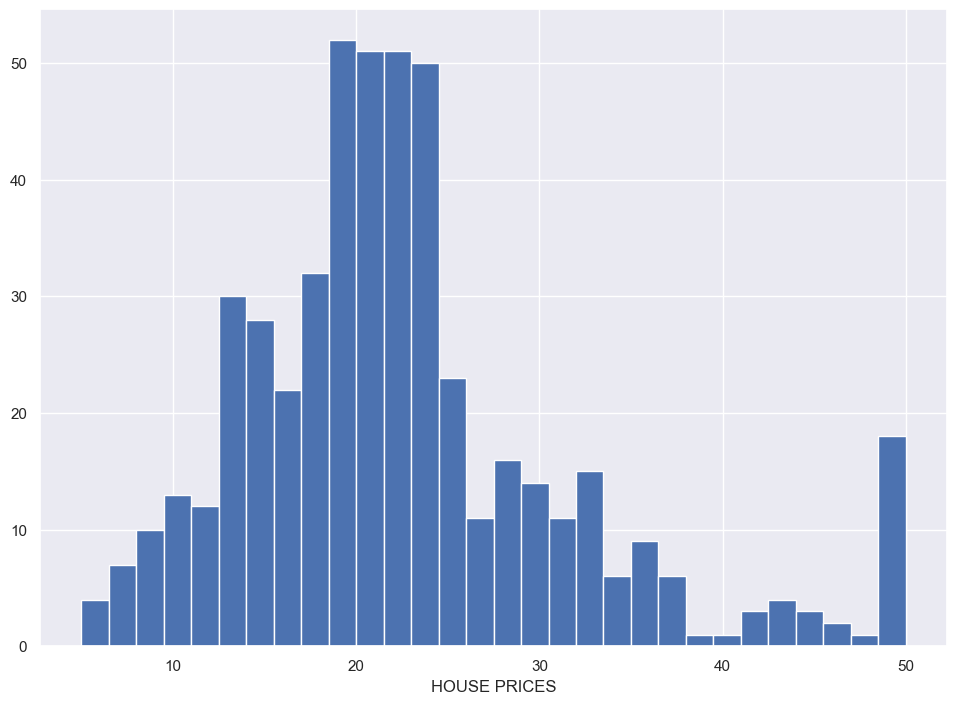

In [91]:
sns.set(rc = {'figure.figsize': (11.7, 8.27)})
plt.hist(data["medv"], bins = 30)
plt.xlabel("HOUSE PRICES")
plt.show()

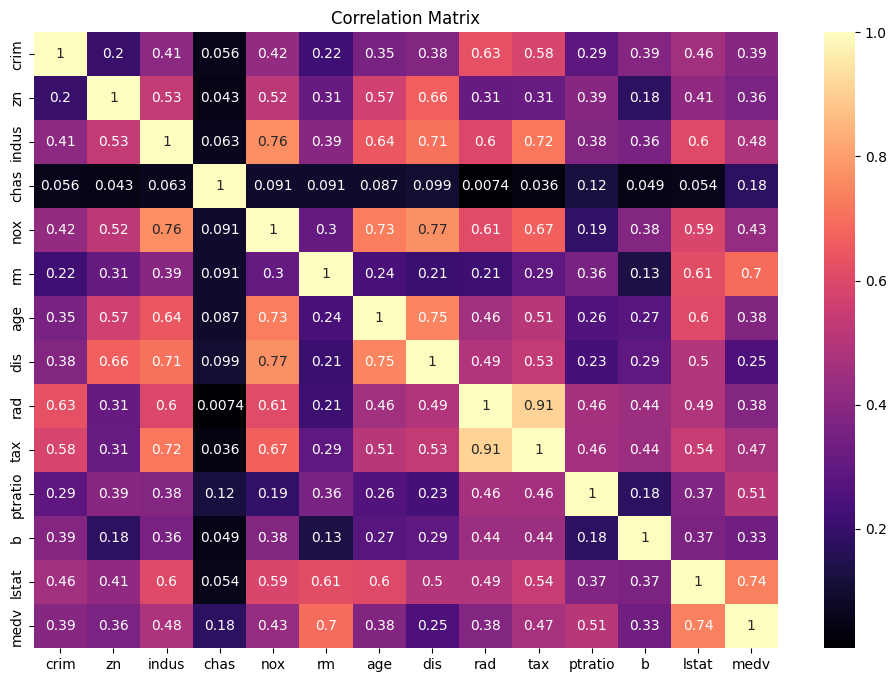

In [87]:
corrMat = data.corr()

fig,ax = plt.subplots(figsize = (12,8))
sns.heatmap(corrMat.abs(), annot=True, cmap="magma")

ax.set_title("Correlation Matrix")
plt.show()

In [37]:
# Notable features: Rm, lstat, ptratio,indus, tax, nox

In [93]:
X = pd.DataFrame(np.c_[data["lstat"], data["rm"], data["ptratio"], data["indus"], data["tax"], data["nox"]], columns = ["LSTAT", "RM", "PTRATIO","INDUS", "TAX", "NOX"])
Y = data["medv"]
X.head()

,LSTAT,RM,PTRATIO,INDUS,TAX,NOX
0,4.98,6.575,15.3,2.31,296.0,0.538
1,9.14,6.421,17.8,7.07,242.0,0.469
2,4.03,7.185,17.8,7.07,242.0,0.469
3,2.94,6.998,18.7,2.18,222.0,0.458
4,5.33,7.147,18.7,2.18,222.0,0.458


In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=11)


In [95]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 6)
(102, 6)
(404,)
(102,)


In [99]:
k =5 
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [100]:
model = linear_model.LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [105]:
print("5 fold cross validation on test data")
print(cross_val_score(model,X_test,Y_test, cv = kf, scoring='r2'))
print("-----------------")
print("5 fold cross validation on train data")
print(cross_val_score(model,X_train,Y_train, cv = kf, scoring='r2'))

5 fold cross validation on test data
[0.41575222 0.80951944 0.62758669 0.5298135  0.38450394]
-----------------
5 fold cross validation on train data
[0.7400044  0.62086624 0.64729459 0.61576713 0.70113793]


In [106]:
Y_Train_pred = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, Y_Train_pred)))
r2 = metrics.r2_score(Y_train, Y_Train_pred)

In [81]:
print("RMSE: ", rmse)
print("R2 score: ", r2)

RMSE:  5.145816888147593
R2 score:  0.6846942579745855


In [107]:
Y_test_pred = model.predict(X_test)
rmse_test = (np.sqrt(mean_squared_error(Y_test, Y_test_pred)))
r2_test = metrics.r2_score(Y_test, Y_test_pred)
print("RMSE: ", rmse_test)
print("R2 score: ", r2_test)

RMSE:  5.398386049198797
R2 score:  0.6603339625675082
